In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Load the data

In [2]:
df = pd.read_csv('../data/airport_choice_survey_practice_Shuai.csv')

### Preview the data type

In [3]:
df.dtypes

ID                             int64
Airport                        int64
Airline                      float64
Age                          float64
Gender                       float64
Nationality                    int64
TripPurpose                    int64
TripDuration                   int64
FlyingCompanion                int64
ProvinceResidence              int64
GroupTravel                    int64
NoTripsLastYear                int64
FrequentFlightDestination     object
Destination                  float64
FlightNo                      object
DepartureHr                  float64
DepartureMn                  float64
DepartureTime                  int64
SeatClass                    float64
Airfare                      float64
NoTransport                    int64
ModeTransport                  int64
AccessCost                   float64
AccessTime                   float64
Occupation                     int64
Income                       float64
MileageAirline                object
M

### Check the missing value for each field

In [4]:
# Numbers of missing value
df.isnull().sum()
# The columns with NA cannot convert to Int64

ID                             0
Airport                        0
Airline                       10
Age                            1
Gender                         3
Nationality                    0
TripPurpose                    0
TripDuration                   0
FlyingCompanion                0
ProvinceResidence              0
GroupTravel                    0
NoTripsLastYear                0
FrequentFlightDestination      0
Destination                    5
FlightNo                     142
DepartureHr                   34
DepartureMn                  120
DepartureTime                  0
SeatClass                      4
Airfare                      155
NoTransport                    0
ModeTransport                  0
AccessCost                   197
AccessTime                    97
Occupation                     0
Income                       132
MileageAirline               237
Mileage                      398
dtype: int64

In [5]:
# Percentage of missing values
df.isna().mean().round(4) * 100

ID                            0.00
Airport                       0.00
Airline                       2.05
Age                           0.20
Gender                        0.61
Nationality                   0.00
TripPurpose                   0.00
TripDuration                  0.00
FlyingCompanion               0.00
ProvinceResidence             0.00
GroupTravel                   0.00
NoTripsLastYear               0.00
FrequentFlightDestination     0.00
Destination                   1.02
FlightNo                     29.10
DepartureHr                   6.97
DepartureMn                  24.59
DepartureTime                 0.00
SeatClass                     0.82
Airfare                      31.76
NoTransport                   0.00
ModeTransport                 0.00
AccessCost                   40.37
AccessTime                   19.88
Occupation                    0.00
Income                       27.05
MileageAirline               48.57
Mileage                      81.56
dtype: float64

### convert the data type

__object:__ ID  
__int64:__  TripDuration, FlyingCompanion, NoTripsLastYear, NoTransport  
__float64:__ Age, DepartureHr, DepartureMn, Airfare, AccessCost, AccessTime, Mileage  
__bool:__  
__category:__ Airport, Airline, Gender, Nationality, TripPurpose, ProvinceResidence, GroupTravel, FrequentFlightDestination, Destination, FlightNo, DepartureTime, SeatClass, ModeTransport, Occupation, Income, MileageAirline

In [6]:
df['ID'] = df['ID'].astype('object')

In [7]:
for i in ['TripDuration', 'FlyingCompanion', 'NoTripsLastYear', 'NoTransport']:
    df[i] = df[i].astype('int64')

In [8]:
for i in ['Age', 'DepartureHr', 'DepartureMn', 'Airfare', 'AccessCost', 'AccessTime', 'Mileage']:
    df[i] = df[i].astype('float64')

In [9]:
for i in ['Airport', 'Airline', 'Gender', 'Nationality', 'TripPurpose', 'ProvinceResidence', 'GroupTravel', 'FrequentFlightDestination', 'Destination', 'FlightNo', 'DepartureTime', 'SeatClass', 'ModeTransport', 'Occupation', 'Income', 'MileageAirline']:
    df[i] = df[i].astype('category')

In [10]:
df.dtypes

ID                             object
Airport                      category
Airline                      category
Age                           float64
Gender                       category
Nationality                  category
TripPurpose                  category
TripDuration                    int64
FlyingCompanion                 int64
ProvinceResidence            category
GroupTravel                  category
NoTripsLastYear                 int64
FrequentFlightDestination    category
Destination                  category
FlightNo                     category
DepartureHr                   float64
DepartureMn                   float64
DepartureTime                category
SeatClass                    category
Airfare                       float64
NoTransport                     int64
ModeTransport                category
AccessCost                    float64
AccessTime                    float64
Occupation                   category
Income                       category
MileageAirli

### Data wrangling principles
Error value:  
(1) Error value of W7667 in the field of "DepartureHR" of "ID 399". Correct this record by moving W7667 into "FlightNo"  
Missing Value:   
(2) The missing values of following fields will be replaced with mode number  
(3) The missing values of following fields will be replaced with zero  
(4) The following fields will be removed because too many missing values and also it is not related to the traveler's choice.   
    - MileageAirline 
    - Mileage

In [11]:
miss = df.isnull().sum()
type(miss)

pandas.core.series.Series

In [12]:
# Convert to dummies
# df2 = pd.get_dummies(df['Airport'], prefix=['Airport'])
# df3 = df.join(df2, how='outer')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 28 columns):
ID                           488 non-null object
Airport                      488 non-null category
Airline                      478 non-null category
Age                          487 non-null float64
Gender                       485 non-null category
Nationality                  488 non-null category
TripPurpose                  488 non-null category
TripDuration                 488 non-null int64
FlyingCompanion              488 non-null int64
ProvinceResidence            488 non-null category
GroupTravel                  488 non-null category
NoTripsLastYear              488 non-null int64
FrequentFlightDestination    488 non-null category
Destination                  483 non-null category
FlightNo                     346 non-null category
DepartureHr                  454 non-null float64
DepartureMn                  368 non-null float64
DepartureTime                488 non-null 

### EDA  

The EDA will be guided by following questions: 
1. In this data set, what's distribution of records departing from ICN and GMP?  


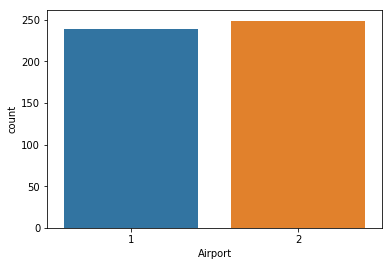

In [34]:
sns.countplot(x="Airport", data=df)

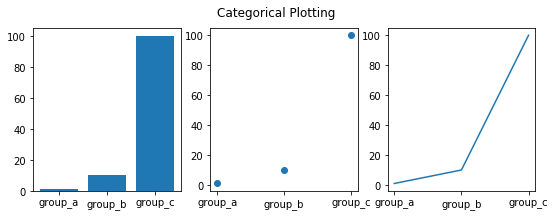

In [30]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.figure(1, figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()